In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import math
%matplotlib inline

# PROBLEM 1

Read IMUdata using pandas dataframe

In [2]:
imu_data = pd.read_csv('IMUData.csv')

In [3]:
imu_data.head()

,time,gyroscope.X,gyroscope.Y,gyroscope.Z,accelerometer.X,accelerometer.Y,accelerometer.Z,magnetometer.X,magnetometer.Y,magnetometer.Z
0,0.000000,-0.9375,-1.250,0.875,0.019043,-0.052246,0.97803,0.20996,0.031250,-0.44873
1,0.003906,-0.9375,-1.250,0.875,0.019043,-0.052246,0.97803,0.20996,0.031250,-0.44873
2,0.007812,-0.9375,-1.875,0.250,0.019043,-0.067871,0.99756,0.20996,0.031250,-0.44873
3,0.011719,-1.3125,-2.000,0.125,0.026855,-0.032715,0.98975,0.21484,0.041016,-0.45361
4,0.015625,-1.7500,-2.125,0.000,0.003418,-0.032715,0.99365,0.21484,0.041016,-0.45361


,time,gyroscope.X,gyroscope.Y,gyroscope.Z,accelerometer.X,accelerometer.Y,accelerometer.Z,magnetometer.X,magnetometer.Y,magnetometer.Z
0,0.000000,-0.9375,-1.250,0.875,0.019043,-0.052246,0.97803,0.20996,0.031250,-0.44873
1,0.003906,-0.9375,-1.250,0.875,0.019043,-0.052246,0.97803,0.20996,0.031250,-0.44873
2,0.007812,-0.9375,-1.875,0.250,0.019043,-0.067871,0.99756,0.20996,0.031250,-0.44873
3,0.011719,-1.3125,-2.000,0.125,0.026855,-0.032715,0.98975,0.21484,0.041016,-0.45361
4,0.015625,-1.7500,-2.125,0.000,0.003418,-0.032715,0.99365,0.21484,0.041016,-0.45361


In [4]:
imu_data.columns

Index(['time', ' gyroscope.X', ' gyroscope.Y', ' gyroscope.Z',
       ' accelerometer.X', ' accelerometer.Y', ' accelerometer.Z',
       ' magnetometer.X', ' magnetometer.Y', ' magnetometer.Z '],
      dtype='object')

Index(['time', ' gyroscope.X', ' gyroscope.Y', ' gyroscope.Z',
       ' accelerometer.X', ' accelerometer.Y', ' accelerometer.Z',
       ' magnetometer.X', ' magnetometer.Y', ' magnetometer.Z '],
      dtype='object')

## Gyroscope data

In [5]:
gyroscope_data = imu_data[['time', ' gyroscope.X', ' gyroscope.Y', ' gyroscope.Z']].rename(columns = {' gyroscope.X':'x', ' gyroscope.Y':'y', ' gyroscope.Z':'z'})

In [6]:
gyroscope_data.head()

,time,x,y,z
0,0.000000,-0.9375,-1.250,0.875
1,0.003906,-0.9375,-1.250,0.875
2,0.007812,-0.9375,-1.875,0.250
3,0.011719,-1.3125,-2.000,0.125
4,0.015625,-1.7500,-2.125,0.000


,time,x,y,z
0,0.000000,-0.9375,-1.250,0.875
1,0.003906,-0.9375,-1.250,0.875
2,0.007812,-0.9375,-1.875,0.250
3,0.011719,-1.3125,-2.000,0.125
4,0.015625,-1.7500,-2.125,0.000


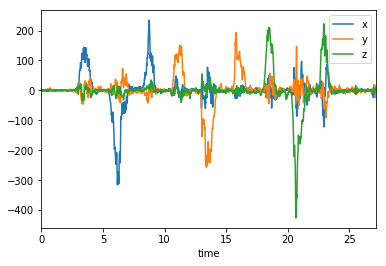

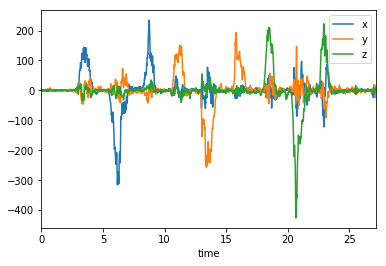

In [7]:
gyroscope_data[['time', 'x', 'y', 'z']].plot('time')

## Accelerometer data

In [8]:
accelerometer_data = imu_data[['time', ' accelerometer.X', ' accelerometer.Y', ' accelerometer.Z']].rename(columns = {' accelerometer.X':'x', ' accelerometer.Y':'y', ' accelerometer.Z':'z'})

In [9]:
accelerometer_data.head()

,time,x,y,z
0,0.000000,0.019043,-0.052246,0.97803
1,0.003906,0.019043,-0.052246,0.97803
2,0.007812,0.019043,-0.067871,0.99756
3,0.011719,0.026855,-0.032715,0.98975
4,0.015625,0.003418,-0.032715,0.99365


,time,x,y,z
0,0.000000,0.019043,-0.052246,0.97803
1,0.003906,0.019043,-0.052246,0.97803
2,0.007812,0.019043,-0.067871,0.99756
3,0.011719,0.026855,-0.032715,0.98975
4,0.015625,0.003418,-0.032715,0.99365


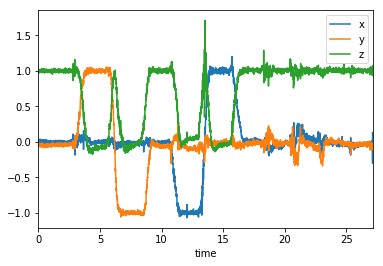

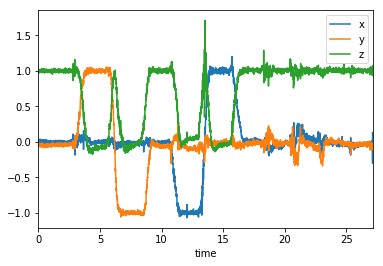

In [10]:
accelerometer_data[['time', 'x', 'y', 'z']].plot('time')

## Magnetometer data

In [11]:
magnetometer_data = imu_data[['time', ' magnetometer.X', ' magnetometer.Y', ' magnetometer.Z ']].rename(columns = {' magnetometer.X':'x', ' magnetometer.Y':'y', ' magnetometer.Z ':'z'})

In [12]:
magnetometer_data.head()

,time,x,y,z
0,0.000000,0.20996,0.031250,-0.44873
1,0.003906,0.20996,0.031250,-0.44873
2,0.007812,0.20996,0.031250,-0.44873
3,0.011719,0.21484,0.041016,-0.45361
4,0.015625,0.21484,0.041016,-0.45361


,time,x,y,z
0,0.000000,0.20996,0.031250,-0.44873
1,0.003906,0.20996,0.031250,-0.44873
2,0.007812,0.20996,0.031250,-0.44873
3,0.011719,0.21484,0.041016,-0.45361
4,0.015625,0.21484,0.041016,-0.45361


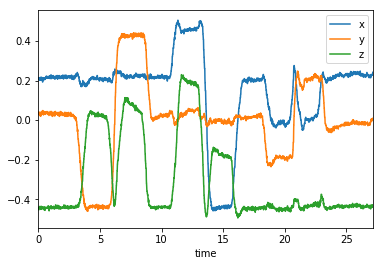

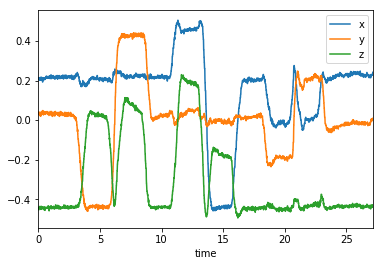

In [13]:
magnetometer_data[['time', 'x', 'y', 'z']].plot('time')

## Convert rotational rate from degrees/sec to radians/sec

In [14]:
gyroscope_data[['x', 'y', 'z']] = np.radians(gyroscope_data[['x', 'y', 'z']])

In [15]:
gyroscope_data.head()

,time,x,y,z
0,0.000000,-0.016362,-0.021817,0.015272
1,0.003906,-0.016362,-0.021817,0.015272
2,0.007812,-0.016362,-0.032725,0.004363
3,0.011719,-0.022907,-0.034907,0.002182
4,0.015625,-0.030543,-0.037088,0.000000


,time,x,y,z
0,0.000000,-0.016362,-0.021817,0.015272
1,0.003906,-0.016362,-0.021817,0.015272
2,0.007812,-0.016362,-0.032725,0.004363
3,0.011719,-0.022907,-0.034907,0.002182
4,0.015625,-0.030543,-0.037088,0.000000


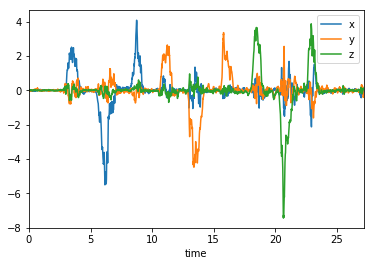

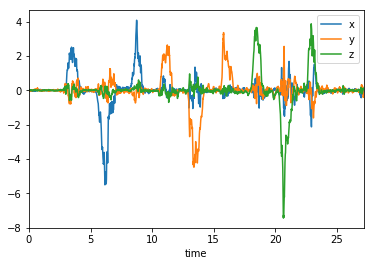

In [16]:
gyroscope_data[['time', 'x', 'y', 'z']].plot('time')

In [17]:
accelerometer_data[['x', 'y', 'z']] = np.radians(accelerometer_data[['x', 'y', 'z']])

In [18]:
accelerometer_data['magnitude'] = np.sqrt(np.square(accelerometer_data[['x', 'y', 'z']]).sum(axis=1))

In [19]:
accelerometer_data.head()

,time,x,y,z,magnitude
0,0.000000,0.000332,-0.000912,0.017070,0.017097
1,0.003906,0.000332,-0.000912,0.017070,0.017097
2,0.007812,0.000332,-0.001185,0.017411,0.017454
3,0.011719,0.000469,-0.000571,0.017274,0.017290
4,0.015625,0.000060,-0.000571,0.017342,0.017352


,time,x,y,z,magnitude
0,0.000000,0.000332,-0.000912,0.017070,0.017097
1,0.003906,0.000332,-0.000912,0.017070,0.017097
2,0.007812,0.000332,-0.001185,0.017411,0.017454
3,0.011719,0.000469,-0.000571,0.017274,0.017290
4,0.015625,0.000060,-0.000571,0.017342,0.017352


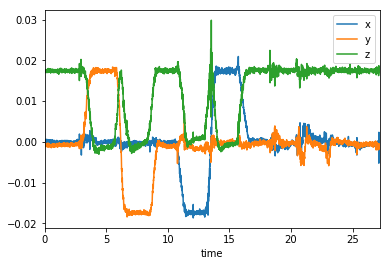

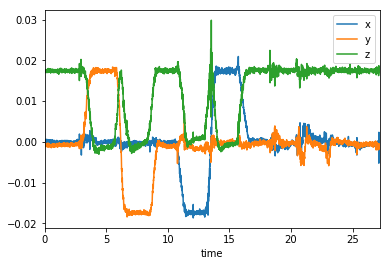

In [20]:
accelerometer_data[['time', 'x', 'y', 'z']].plot('time')

In [21]:
magnetometer_data[['x', 'y', 'z']] = np.radians(magnetometer_data[['x', 'y', 'z']])

In [22]:
magnetometer_data['magnitude'] = np.sqrt(np.square(magnetometer_data[['x', 'y', 'z']]).sum(axis=1))

In [23]:
magnetometer_data.head()

,time,x,y,z,magnitude
0,0.000000,0.003664,0.000545,-0.007832,0.008664
1,0.003906,0.003664,0.000545,-0.007832,0.008664
2,0.007812,0.003664,0.000545,-0.007832,0.008664
3,0.011719,0.003750,0.000716,-0.007917,0.008789
4,0.015625,0.003750,0.000716,-0.007917,0.008789


,time,x,y,z,magnitude
0,0.000000,0.003664,0.000545,-0.007832,0.008664
1,0.003906,0.003664,0.000545,-0.007832,0.008664
2,0.007812,0.003664,0.000545,-0.007832,0.008664
3,0.011719,0.003750,0.000716,-0.007917,0.008789
4,0.015625,0.003750,0.000716,-0.007917,0.008789


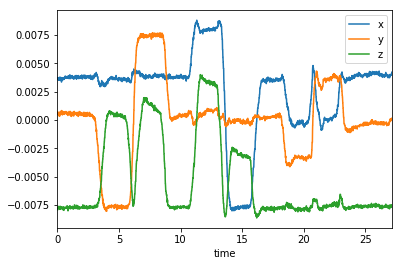

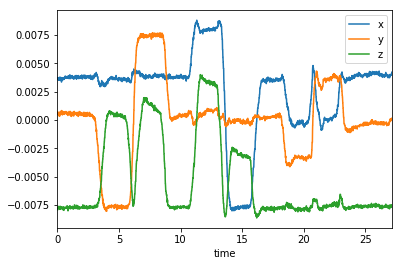

In [24]:
magnetometer_data[['time', 'x', 'y', 'z']].plot('time')

## Normalize magnitude of both the accelerometer and magnetometer, $v = \frac{(w_x, w_y, w_z)} {||w||}$

In [25]:
accelerometer_data[['x', 'y', 'z']] = accelerometer_data[['x', 'y', 'z']].div(accelerometer_data['magnitude'], axis=0)

In [26]:
accelerometer_data.head()

,time,x,y,z,magnitude
0,0.000000,0.019439,-0.053333,0.998388,0.017097
1,0.003906,0.019439,-0.053333,0.998388,0.017097
2,0.007812,0.019042,-0.067868,0.997513,0.017454
3,0.011719,0.027108,-0.033024,0.999087,0.017290
4,0.015625,0.003438,-0.032906,0.999453,0.017352


,time,x,y,z,magnitude
0,0.000000,0.019439,-0.053333,0.998388,0.017097
1,0.003906,0.019439,-0.053333,0.998388,0.017097
2,0.007812,0.019042,-0.067868,0.997513,0.017454
3,0.011719,0.027108,-0.033024,0.999087,0.017290
4,0.015625,0.003438,-0.032906,0.999453,0.017352


In [27]:
magnetometer_data[['x', 'y', 'z']] = magnetometer_data[['x', 'y', 'z']].div(magnetometer_data['magnitude'], axis=0)

In [28]:
magnetometer_data.head()

,time,x,y,z,magnitude
0,0.000000,0.422961,0.062953,-0.903959,0.008664
1,0.003906,0.422961,0.062953,-0.903959,0.008664
2,0.007812,0.422961,0.062953,-0.903959,0.008664
3,0.011719,0.426619,0.081448,-0.900757,0.008789
4,0.015625,0.426619,0.081448,-0.900757,0.008789


,time,x,y,z,magnitude
0,0.000000,0.422961,0.062953,-0.903959,0.008664
1,0.003906,0.422961,0.062953,-0.903959,0.008664
2,0.007812,0.422961,0.062953,-0.903959,0.008664
3,0.011719,0.426619,0.081448,-0.900757,0.008789
4,0.015625,0.426619,0.081448,-0.900757,0.008789


source [wikipedia](https://en.wikipedia.org/wiki/Conversion_between_quaternions_and_Euler_angles)  
The Euler angles: yaw (Y), pitch (X), roll (Z)

In [29]:
def euler2quaternions(yaw, pitch, roll):
    # Abbreviations for the various angular functions
    cy = np.cos(yaw * 0.5)
    sy = np.sin(yaw * 0.5)
    cp = np.cos(pitch * 0.5)
    sp = np.sin(pitch * 0.5)
    cr = np.cos(roll * 0.5)
    sr = np.sin(roll * 0.5)

    q_w = cy * cp * cr + sy * sp * sr
    q_x = cy * cp * sr - sy * sp * cr
    q_y = sy * cp * sr + cy * sp * cr
    q_z = sy * cp * cr - cy * sp * sr
    return np.array([[q_w, q_x, q_y, q_z]])

In [30]:
def quaternions2euler(quaterniond):
    # roll (x-axis rotation)
    q_w = quaterniond[0][0]
    q_x = quaterniond[0][1]
    q_y = quaterniond[0][2]
    q_z = quaterniond[0][3]
    sinr_cosp = 2.0 * (q_w * q_x + q_y * q_z)
    cosr_cosp = 1.0 - 2.0 * (q_x * q_x + q_y * q_y)
    roll = math.atan2(sinr_cosp, cosr_cosp)

    # pitch (y-axis rotation)
    sinp = 2.0 * (q_w * q_y - q_z * q_x);
    if (fabs(sinp) >= 1): pitch = copysign(M_PI / 2, sinp) # use 90 degrees if out of range
    else: pitch = asin(sinp)

    # yaw (z-axis rotation)
    siny_cosp = 2.0 * (q_w * q_z + q_x * qy)
    yaw = math.atan2(siny_cosp, cosy_cosp)
    return np.array([[roll, pitch, yaw]])

The quaternion conjugate has the form of
q' = q0 − iq1 − jq2 − kq3

In [31]:
def quaternions_conjugate(quaternion):
    return quaternion * np.array([[1, -1, -1, -1]])

In [55]:
def quaternions_product(a, b):
    w0, x0, y0, z0 = a[0]
    w1, x1, y1, z1 = b[0]
    return np.array([[w0 * w1 - x0 * x1 - y0 * y1 - z0 * z1,
                     w0 * x1 + x0 * w1 + y0 * z1 - z0 * y1,
                     w0 * y1 - x0 * z1 + y0 * w1 + z0 * x1,
                     w0 * z1 + x0 * y1 - y0 * x1 + z0 * w1]], dtype=np.float64)

In [133]:
a = np.array([[1,0,0,0]])
b = np.array([[1,2,3,4]])

In [135]:
quaternions_product(a,b)

array([[1., 2., 3., 4.]])

array([[1., 2., 3., 4.]])

# PROBLEM 2

$ q(v, \theta) = (cos(\theta/2), v_x sin(\theta/2), v_y sin(\theta/2), v_z sin(\theta/2)) $

In [51]:
def axisAngle2quaternion(axis, angle):
    v_x, v_y, v_z = axis[0]
    half_angle = angle / 2
    return np.array([[math.cos(half_angle), v_x * math.sin(half_angle), v_y * math.sin(half_angle), v_z * math.sin(half_angle)]])

### dead reckoning filter 
$q_{k-1}$ represent the estimated orientation at stage k - 1, $q_0$ equals the intial, identity quaternion.  
$q(v, \theta)$ represent the axis-angle representation of gyroscope reading at stage k, $w_k$, where $v = \frac{w_k}{||w_k||}$ and $\theta = ||w_k||\Delta t$  
The estimated orientation for the stage k:
$$q_{k} = q_{k-1} \otimes q(v, \theta)$$

In [105]:
q = np.array([[1.0,0,0,0]])
orientation_est = [q]
dt = 0.003906
for index, row in gyroscope_data.iterrows():
    q_gyro = np.array([[0, row['x'], row['y'], row['z']]])
    q_dot = 0.5 * quaternions_product(q, q_gyro)
    q = np.add(q, q_dot * dt)
    q = np.divide(q, np.sqrt(np.sum(np.square(q)))) #normalize
    orientation_est += [q]

In [106]:
orientation_est

[array([[1., 0., 0., 0.]]),
 array([[ 9.99999998e-01, -3.19558877e-05, -4.26078503e-05,
          2.98254952e-05]]),
 array([[ 9.99999993e-01, -6.39117753e-05, -8.52157004e-05,
          5.96509903e-05]]),
 array([[ 9.99999982e-01, -9.58645764e-05, -1.49128837e-04,
          6.81739217e-05]]),
 array([[ 9.99999964e-01, -1.40598806e-04, -2.17304037e-04,
          7.24345700e-05]]),
 array([[ 9.99999935e-01, -2.00244547e-04, -2.89741699e-04,
          7.24317913e-05]]),
 array([[ 9.99999898e-01, -2.53496794e-04, -3.68571353e-04,
          6.60409665e-05]]),
 array([[ 9.99999856e-01, -2.96098929e-04, -4.43138436e-04,
          6.39137716e-05]]),
 array([[ 9.99999814e-01, -3.30180039e-04, -5.09183403e-04,
          6.17878292e-05]]),
 array([[ 9.99999773e-01, -3.57872666e-04, -5.66704997e-04,
          6.39231115e-05]]),
 array([[ 9.99999739e-01, -3.79173726e-04, -6.11444590e-04,
          6.39270490e-05]]),
 array([[ 9.99999704e-01, -4.09004714e-04, -6.47658313e-04,
          7.67048964e-

[array([[1., 0., 0., 0.]]),
 array([[ 9.99999998e-01, -3.19558877e-05, -4.26078503e-05,
          2.98254952e-05]]),
 array([[ 9.99999993e-01, -6.39117753e-05, -8.52157004e-05,
          5.96509903e-05]]),
 array([[ 9.99999982e-01, -9.58645764e-05, -1.49128837e-04,
          6.81739217e-05]]),
 array([[ 9.99999964e-01, -1.40598806e-04, -2.17304037e-04,
          7.24345700e-05]]),
 array([[ 9.99999935e-01, -2.00244547e-04, -2.89741699e-04,
          7.24317913e-05]]),
 array([[ 9.99999898e-01, -2.53496794e-04, -3.68571353e-04,
          6.60409665e-05]]),
 array([[ 9.99999856e-01, -2.96098929e-04, -4.43138436e-04,
          6.39137716e-05]]),
 array([[ 9.99999814e-01, -3.30180039e-04, -5.09183403e-04,
          6.17878292e-05]]),
 array([[ 9.99999773e-01, -3.57872666e-04, -5.66704997e-04,
          6.39231115e-05]]),
 array([[ 9.99999739e-01, -3.79173726e-04, -6.11444590e-04,
          6.39270490e-05]]),
 array([[ 9.99999704e-01, -4.09004714e-04, -6.47658313e-04,
          7.67048964e-

In [123]:
dt = 0.003906    
q = [np.array([[1.0,0,0,0]])]
for index, row in gyroscope_data.iterrows():
    w_k = np.array([[row['x'], row['y'], row['z']]])
    l = np.sqrt(np.sum(np.square(w_k)))
    v = np.divide(w_k, l)
    theta = l * dt 
    q_gyro = axisAngle2quaternion(v, theta)
    q += [quaternions_product(q[index], q_gyro)]

In [124]:
q

[array([[1., 0., 0., 0.]]),
 array([[ 9.99999998e-01, -3.19558878e-05, -4.26078503e-05,
          2.98254952e-05]]),
 array([[ 9.99999993e-01, -6.39117754e-05, -8.52157005e-05,
          5.96509904e-05]]),
 array([[ 9.99999982e-01, -9.58645765e-05, -1.49128837e-04,
          6.81739218e-05]]),
 array([[ 9.99999964e-01, -1.40598806e-04, -2.17304037e-04,
          7.24345701e-05]]),
 array([[ 9.99999935e-01, -2.00244547e-04, -2.89741700e-04,
          7.24317914e-05]]),
 array([[ 9.99999898e-01, -2.53496794e-04, -3.68571354e-04,
          6.60409665e-05]]),
 array([[ 9.99999856e-01, -2.96098930e-04, -4.43138437e-04,
          6.39137716e-05]]),
 array([[ 9.99999814e-01, -3.30180039e-04, -5.09183404e-04,
          6.17878293e-05]]),
 array([[ 9.99999773e-01, -3.57872667e-04, -5.66704998e-04,
          6.39231116e-05]]),
 array([[ 9.99999739e-01, -3.79173727e-04, -6.11444592e-04,
          6.39270491e-05]]),
 array([[ 9.99999704e-01, -4.09004715e-04, -6.47658314e-04,
          7.67048965e-

[array([[1., 0., 0., 0.]]),
 array([[ 9.99999998e-01, -3.19558878e-05, -4.26078503e-05,
          2.98254952e-05]]),
 array([[ 9.99999993e-01, -6.39117754e-05, -8.52157005e-05,
          5.96509904e-05]]),
 array([[ 9.99999982e-01, -9.58645765e-05, -1.49128837e-04,
          6.81739218e-05]]),
 array([[ 9.99999964e-01, -1.40598806e-04, -2.17304037e-04,
          7.24345701e-05]]),
 array([[ 9.99999935e-01, -2.00244547e-04, -2.89741700e-04,
          7.24317914e-05]]),
 array([[ 9.99999898e-01, -2.53496794e-04, -3.68571354e-04,
          6.60409665e-05]]),
 array([[ 9.99999856e-01, -2.96098930e-04, -4.43138437e-04,
          6.39137716e-05]]),
 array([[ 9.99999814e-01, -3.30180039e-04, -5.09183404e-04,
          6.17878293e-05]]),
 array([[ 9.99999773e-01, -3.57872667e-04, -5.66704998e-04,
          6.39231116e-05]]),
 array([[ 9.99999739e-01, -3.79173727e-04, -6.11444592e-04,
          6.39270491e-05]]),
 array([[ 9.99999704e-01, -4.09004715e-04, -6.47658314e-04,
          7.67048965e-

# PROBLEM 3

## Gravity based tilt correction using the accelerometer

Transform acceleration measurements into the global frame
$$\hat{u} = q^{-1}_{k} \otimes \tilde{a} \otimes q_{k}$$
$\hat{u}$ is a direct estimate of the gravity vector, $q^{-1}_k$ will be quaternion conjugate as q is assumed to be a  unit quaternion  
To calculate the axis, project $\hat{u}$ into the XZ plane to obtain $(\hat{u}_x,0,\hat{u}_z)$. The tilt axis is orthogonal: $t = (\hat{u}_z,0,−\hat{u}_x)$  
The tilt error φ is the angle between $\hat{u}$ and the vector (0, 1, 0).  
The output of the complementary filter with gain $\alpha\ll1$ is
$$q_{k}' = q(t, -\alpha\phi) \otimes q_{k}$$
in which t is the tilt axis. The parameter $\alpha$ should be large enough to correct all drift, but small enough so that the corrections are imperceptible to the user.

In [127]:
n = imu_data.shape[0]
dt = 0.003906    
alpha = 0.1
q = [np.array([[1.0,0,0,0]])]
for i in range(n):
    gyro_row = gyroscope_data.loc[i]
    w_k = np.array([[gyro_row['x'], gyro_row['y'], gyro_row['z']]])
    l = np.sqrt(np.sum(np.square(w_k)))
    v = np.divide(w_k, l)
    theta = l * dt 
    q_gyro = axisAngle2quaternion(v, theta)
    q_k = quaternions_product(q[i], q_gyro)
    q_conj = quaternions_conjugate(q_k)
    acc_row = accelerometer_data.loc[i]
    a = np.array([[0, acc_row['x'], acc_row['y'], acc_row['z']]])
    u = quaternions_product(q_conj, quaternions_product(a, q_k)) # global frame
    t = np.array([[u[0][3], 0, -u[0][1]]]) # tilt axis
    phi = math.acos(np.dot(np.array([0, 1, 0]), u[0][1:])) # tilt error angle
    q_t = axisAngle2quaternion(t, -alpha*phi) # complementary filter q(t,-alpha * phi)
    q_k = quaternions_product(q_t, q_k)
    q += [q_k]

In [128]:
q

[array([[1., 0., 0., 0.]]),
 array([[ 9.99966758e-01, -8.13982368e-03, -4.23696899e-05,
          1.88702445e-04]]),
 array([[ 9.99865962e-01, -1.63521398e-02, -8.42584706e-05,
          3.80169443e-04]]),
 array([[ 9.99694238e-01, -2.46958286e-02, -1.47428075e-04,
          5.51986098e-04]]),
 array([[ 9.99455088e-01, -3.29723441e-02, -2.16516195e-04,
          7.86722913e-04]]),
 array([[ 9.99143817e-01, -4.13340986e-02, -2.83469638e-04,
          8.24102544e-04]]),
 array([[ 9.98764449e-01, -4.96569456e-02, -3.55946750e-04,
          8.29259250e-04]]),
 array([[ 9.98307695e-01, -5.81102244e-02, -4.22238849e-04,
          8.08147523e-04]]),
 array([[ 9.97774292e-01, -6.66305890e-02, -4.87432235e-04,
          9.17254372e-04]]),
 array([[ 9.97160866e-01, -7.52398963e-02, -5.32751330e-04,
          8.68074041e-04]]),
 array([[ 9.96471839e-01, -8.38559285e-02, -5.80448902e-04,
          1.01686661e-03]]),
 array([[ 9.95701902e-01, -9.25326096e-02, -6.12777488e-04,
          1.11240189e-

[array([[1., 0., 0., 0.]]),
 array([[ 9.99966758e-01, -8.13982368e-03, -4.23696899e-05,
          1.88702445e-04]]),
 array([[ 9.99865962e-01, -1.63521398e-02, -8.42584706e-05,
          3.80169443e-04]]),
 array([[ 9.99694238e-01, -2.46958286e-02, -1.47428075e-04,
          5.51986098e-04]]),
 array([[ 9.99455088e-01, -3.29723441e-02, -2.16516195e-04,
          7.86722913e-04]]),
 array([[ 9.99143817e-01, -4.13340986e-02, -2.83469638e-04,
          8.24102544e-04]]),
 array([[ 9.98764449e-01, -4.96569456e-02, -3.55946750e-04,
          8.29259250e-04]]),
 array([[ 9.98307695e-01, -5.81102244e-02, -4.22238849e-04,
          8.08147523e-04]]),
 array([[ 9.97774292e-01, -6.66305890e-02, -4.87432235e-04,
          9.17254372e-04]]),
 array([[ 9.97160866e-01, -7.52398963e-02, -5.32751330e-04,
          8.68074041e-04]]),
 array([[ 9.96471839e-01, -8.38559285e-02, -5.80448902e-04,
          1.01686661e-03]]),
 array([[ 9.95701902e-01, -9.25326096e-02, -6.12777488e-04,
          1.11240189e-

In [129]:
n = imu_data.shape[0]
dt = 0.003906    
alpha = 0.01
q = [np.array([[1.0,0,0,0]])]
for i in range(n):
    gyro_row = gyroscope_data.loc[i]
    w_k = np.array([[gyro_row['x'], gyro_row['y'], gyro_row['z']]])
    l = np.sqrt(np.sum(np.square(w_k)))
    v = np.divide(w_k, l)
    theta = l * dt 
    q_gyro = axisAngle2quaternion(v, theta)
    q_k = quaternions_product(q[i], q_gyro)
    q_conj = quaternions_conjugate(q_k)
    acc_row = accelerometer_data.loc[i]
    a = np.array([[0, acc_row['x'], acc_row['y'], acc_row['z']]])
    u = quaternions_product(q_conj, quaternions_product(a, q_k)) # global frame
    t = np.array([[u[0][3], 0, -u[0][1]]]) # tilt axis
    phi = math.acos(np.dot(np.array([0, 1, 0]), u[0][1:])) # tilt error angle
    q_t = axisAngle2quaternion(t, -alpha*phi) # complementary filter q(t,-alpha * phi)
    q_k = quaternions_product(q_t, q_k)
    q += [q_k]

In [130]:
q

[array([[1., 0., 0., 0.]]),
 array([[ 9.99966758e-01, -8.13982368e-03, -4.23696899e-05,
          1.88702445e-04]]),
 array([[ 9.99865962e-01, -1.63521398e-02, -8.42584706e-05,
          3.80169443e-04]]),
 array([[ 9.99694238e-01, -2.46958286e-02, -1.47428075e-04,
          5.51986098e-04]]),
 array([[ 9.99455088e-01, -3.29723441e-02, -2.16516195e-04,
          7.86722913e-04]]),
 array([[ 9.99143817e-01, -4.13340986e-02, -2.83469638e-04,
          8.24102544e-04]]),
 array([[ 9.98764449e-01, -4.96569456e-02, -3.55946750e-04,
          8.29259250e-04]]),
 array([[ 9.98307695e-01, -5.81102244e-02, -4.22238849e-04,
          8.08147523e-04]]),
 array([[ 9.97774292e-01, -6.66305890e-02, -4.87432235e-04,
          9.17254372e-04]]),
 array([[ 9.97160866e-01, -7.52398963e-02, -5.32751330e-04,
          8.68074041e-04]]),
 array([[ 9.96471839e-01, -8.38559285e-02, -5.80448902e-04,
          1.01686661e-03]]),
 array([[ 9.95701902e-01, -9.25326096e-02, -6.12777488e-04,
          1.11240189e-

[array([[1., 0., 0., 0.]]),
 array([[ 9.99966758e-01, -8.13982368e-03, -4.23696899e-05,
          1.88702445e-04]]),
 array([[ 9.99865962e-01, -1.63521398e-02, -8.42584706e-05,
          3.80169443e-04]]),
 array([[ 9.99694238e-01, -2.46958286e-02, -1.47428075e-04,
          5.51986098e-04]]),
 array([[ 9.99455088e-01, -3.29723441e-02, -2.16516195e-04,
          7.86722913e-04]]),
 array([[ 9.99143817e-01, -4.13340986e-02, -2.83469638e-04,
          8.24102544e-04]]),
 array([[ 9.98764449e-01, -4.96569456e-02, -3.55946750e-04,
          8.29259250e-04]]),
 array([[ 9.98307695e-01, -5.81102244e-02, -4.22238849e-04,
          8.08147523e-04]]),
 array([[ 9.97774292e-01, -6.66305890e-02, -4.87432235e-04,
          9.17254372e-04]]),
 array([[ 9.97160866e-01, -7.52398963e-02, -5.32751330e-04,
          8.68074041e-04]]),
 array([[ 9.96471839e-01, -8.38559285e-02, -5.80448902e-04,
          1.01686661e-03]]),
 array([[ 9.95701902e-01, -9.25326096e-02, -6.12777488e-04,
          1.11240189e-

# PROBLEM 4

## Yaw drift

The complementary filter for yaw correction is
$$q_{k}' = q((0,1,0), -\alpha_2(\theta - \theta_r)) \otimes q_{k}$$
in which $\alpha_2$ is a small gain constant, similar to the case of tilt correction.

In [138]:
n = imu_data.shape[0]
dt = 0.003906    
alpha = 0.01
alpha_2 = 0.01
eps = 1e-6
q = [np.array([[1.0,0,0,0]])]
for i in range(n):
    ### gyroscope estimations
    gyro_row = gyroscope_data.loc[i]
    w_k = np.array([[gyro_row['x'], gyro_row['y'], gyro_row['z']]])
    l = np.sqrt(np.sum(np.square(w_k)))
    v = np.divide(w_k, l)
    theta = l * dt 
    q_gyro = axisAngle2quaternion(v, theta)
    q_k = quaternions_product(q[i], q_gyro)
    
    ### magnetometer estimations - yaw drift correction
    q_conj = quaternions_conjugate(q_k)
    if i == 0:
        m_ref_row = magnetometer_data.loc[i]
        m_ref_obv = np.array([[0, m_ref_row['x'], m_ref_row['y'], m_ref_row['z']]]) # intial observed value used as reference
        m_ref = quaternions_product(q_conj, quaternions_product(m_ref_obv, q_k))
        theta_ref = math.atan2(m_ref[0][1], m_ref[0][3])
    magn_row = magnetometer_data.loc[i]
    m_obv = np.array([[0, magn_row['x'], magn_row['y'], magn_row['z']]]) # observed magnetometer reading
    m = quaternions_product(q_conj, quaternions_product(m_obv, q_k)) # estimate by world frame
    theta_m = math.atan2(m[0][1], m[0][3])
    # compare m_ref theta to current m theta for yaw drift 
    if np.abs(theta_m - theta_ref) > eps:
        q_m = axisAngle2quaternion(np.array([[0, 1, 0]]), -alpha_2*(theta_m - theta_ref)) # complementry filter for yaw drift
        q_k = quaternions_product(q_m, q_k)
    
    ### accelerometer estimations - tilt error correction (define up)
    q_conj = quaternions_conjugate(q_k)
    acc_row = accelerometer_data.loc[i]
    a = np.array([[0, acc_row['x'], acc_row['y'], acc_row['z']]])
    u = quaternions_product(q_conj, quaternions_product(a, q_k)) # global frame
    t = np.array([[u[0][3], 0, -u[0][1]]]) # tilt axis
    phi = math.acos(np.dot(np.array([0, 1, 0]), u[0][1:])) # tilt error angle
    q_t = axisAngle2quaternion(t, -alpha*phi) # complementary filter for tilt drift
    q_k = quaternions_product(q_t, q_k)    

    q += [q_k]

In [139]:
q

[array([[1., 0., 0., 0.]]),
 array([[ 9.99966758e-01, -8.13982368e-03, -4.23696899e-05,
          1.88702445e-04]]),
 array([[ 9.99865962e-01, -1.63521404e-02, -8.21257961e-05,
          3.80134500e-04]]),
 array([[ 9.99694239e-01, -2.46958306e-02, -1.40668775e-04,
          5.51858258e-04]]),
 array([[ 9.99455096e-01, -3.29723551e-02, -1.76438336e-04,
          7.86428164e-04]]),
 array([[ 9.99143837e-01, -4.13340870e-02, -2.05409026e-04,
          8.23115637e-04]]),
 array([[ 9.98764489e-01, -4.96569006e-02, -2.34763394e-04,
          8.27046883e-04]]),
 array([[ 9.98307761e-01, -5.81101246e-02, -2.52157113e-04,
          8.04060896e-04]]),
 array([[ 9.97774388e-01, -6.66305149e-02, -2.61857858e-04,
          9.10625486e-04]]),
 array([[ 9.97161001e-01, -7.52397098e-02, -2.44181641e-04,
          8.58167215e-04]]),
 array([[ 9.96472006e-01, -8.38558327e-02, -2.20538387e-04,
          1.00297744e-03]]),
 array([[ 9.95702112e-01, -9.25324878e-02, -1.28498476e-04,
          1.09626556e-

[array([[1., 0., 0., 0.]]),
 array([[ 9.99966758e-01, -8.13982368e-03, -4.23696899e-05,
          1.88702445e-04]]),
 array([[ 9.99865962e-01, -1.63521404e-02, -8.21257961e-05,
          3.80134500e-04]]),
 array([[ 9.99694239e-01, -2.46958306e-02, -1.40668775e-04,
          5.51858258e-04]]),
 array([[ 9.99455096e-01, -3.29723551e-02, -1.76438336e-04,
          7.86428164e-04]]),
 array([[ 9.99143837e-01, -4.13340870e-02, -2.05409026e-04,
          8.23115637e-04]]),
 array([[ 9.98764489e-01, -4.96569006e-02, -2.34763394e-04,
          8.27046883e-04]]),
 array([[ 9.98307761e-01, -5.81101246e-02, -2.52157113e-04,
          8.04060896e-04]]),
 array([[ 9.97774388e-01, -6.66305149e-02, -2.61857858e-04,
          9.10625486e-04]]),
 array([[ 9.97161001e-01, -7.52397098e-02, -2.44181641e-04,
          8.58167215e-04]]),
 array([[ 9.96472006e-01, -8.38558327e-02, -2.20538387e-04,
          1.00297744e-03]]),
 array([[ 9.95702112e-01, -9.25324878e-02, -1.28498476e-04,
          1.09626556e-

# PROBLEM 5